## 2-3 量子フーリエ変換

この節では、量子アルゴリズムの中でも最も重要なアルゴリズムの一つである量子フーリエ変換について学ぶ。    
量子フーリエ変換はその名の通りフーリエ変換を行う量子アルゴリズムであり、様々な量子アルゴリズムのサブルーチンとしても呼ばれる。   
(参照：Nielsen-Chuang 5.1 `The quantum Fourier transform`)

### 定義
まず、$2^n$成分の配列 $\{x_j\}$ に対して$(j=1,\cdots,2^n)$、その[離散フーリエ変換](https://ja.wikipedia.org/wiki/離散フーリエ変換)である配列$\{ y_k \}$を
$$
y_k = \frac{1}{\sqrt{2^n}} \sum_{j=1}^{2^n} x_j e^{i\frac{2\pi kj}{2^n}}   \tag{1}
$$
で定義する$(k=1, \cdots 2^n)$。


量子フーリエ変換アルゴリズムは、入力の量子状態
$$
|x\rangle := \sum_{j=1}^{2^n} x_j |j\rangle
$$
を、
$$
|y \rangle := \sum_{k=1}^{2^n} y_k |k\rangle  \tag{2}
$$
となるように変換する量子アルゴリズムである。ここで、$|i \rangle$は、整数$i$の二進数での表示$i_1 \cdots i_n$ ($i_m = 0,1$)に対応する量子状態$|i_1 \cdots i_n \rangle$の略記である。（例えば、$ |2 \rangle = |0\cdots0 10 \rangle, |7 \rangle = |0\cdots0111 \rangle$となる) 

ここで、式(1)を(2)に代入してみると、
$$
 |y \rangle = \frac{1}{\sqrt{2^n}} \sum_{k=1}^{2^n} \sum_{j=1}^{2^n} x_j e^{i\frac{2\pi kj}{2^n}} |k\rangle
             = \sum_{j=1}^{2^n} x_j \left( \frac{1}{\sqrt{2^n}} \sum_{k=1}^{2^n}  e^{i\frac{2\pi kj}{2^n}} |k\rangle \right)
$$
となる。よって、量子フーリエ変換では、
$$
 |j\rangle \to \frac{1}{\sqrt{2^n}} \sum_{k=1}^{2^n}  e^{i\frac{2\pi kj}{2^n}} |k\rangle
$$
を行う量子回路(変換)$U$を見つければ良いことになる。（余裕のある読者は、これがユニタリ変換であることを実際に計算して確かめてみよう）   
この式はさらに式変形できて（やや複雑なので最後の結果だけ見てもよい）
$$
\begin{eqnarray}
  \sum_{k=1}^{2^n} e^{i\frac{2\pi kj}{2^n}} |k\rangle 
 &=& \sum_{k_1=0}^1 \cdots \sum_{k_n=0}^1  e^{i\frac{2\pi (k_1 2^{n-1} + \cdots k_n 2^0 )\cdot j}{2^n}} |k_1 \cdots k_n\rangle \:\:\:\: \text{(kの和を2進数表示で書き直した)} \\
 &=& \sum_{k_1=0}^1 \cdots \sum_{k_n=0}^1  e^{i 2\pi j (k_1 2^{-1} + \cdots k_n 2^{-n})} |k_1 \cdots k_n\rangle \\
 &=& \left( \sum_{k_1=0}^1 e^{i 2\pi j k_1 2^{-1}} |k_1 \rangle \right) \otimes \cdots  \otimes \left( \sum_{k_n=0}^1 e^{i 2\pi j k_n 2^{-n}} |k_n \rangle \right) \:\:\:\: \text{("因数分解"をして、全体をテンソル積で書き直した)} \\
 &=& \left( |0\rangle +  e^{i 2\pi 0.j_n} |1 \rangle \right) \otimes \left( |0\rangle +  e^{i 2\pi 0.j_{n-1}j_n} |1 \rangle \right) \otimes \cdots \otimes \left( |0\rangle +  e^{i 2\pi 0.j_1j_2\cdots j_n} |1 \rangle \right) \:\:\:\: \text{(カッコの中の和を計算した)}
\end{eqnarray}
$$
となる。ここで、   
$$
0.j_l\cdots j_n = \frac{j_l}{2} + \frac{j_{l-1}}{2^2} + \cdots + \frac{j_n}{2^{n-l+1}} 
$$
は二進小数であり、$e^{i 2\pi j/2^{-l} } = e^{i 2\pi j_1 \cdots j_l . j_{l-1}\cdots j_n }
= e^{i 2\pi 0. j_{l-1}\cdots j_n }$となることを用いた。（$e^{i2\pi}=1$なので、整数部分は関係ない）


まとめると、量子フーリエ変換では、
$$
 |j\rangle = |j_1 \cdots j_n \rangle \to \frac{ \left( |0\rangle +  e^{i 2\pi 0.j_n} |1 \rangle \right) \otimes \left( |0\rangle +  e^{i 2\pi 0.j_{n-1}j_n} |1 \rangle \right) \otimes \cdots \otimes \left( |0\rangle +  e^{i 2\pi 0.j_1j_2\cdots j_n} |1 \rangle \right)  }{\sqrt{2^n}}
 \tag{*}
$$
という変換ができればよい。

### 回路の構成
それでは、量子フーリエ変換を実行する回路を実際にどのように構成するかを見ていこう。   
そのために、次のアダマールゲート$H$についての等式（計算すると合っていることが分かる）
$$
 |m \rangle = \frac{|0\rangle + e^{i 2\pi 0.m}|1\rangle }{\sqrt{2}}  \:\:\: (m=0,1)
$$
と、角度 $2\pi/2^l$ の一般位相ゲート
$$
 R_l =
 \begin{pmatrix} 1 & 0\\ 0 & e^{i \frac{2\pi}{2^l} } \end{pmatrix}
$$
を多用する。

1. まず、状態$\left( |0\rangle +  e^{i 2\pi 0.j_1j_2\cdots j_n} |1\rangle \right)$の部分をつくる。1番目の量子ビット$|j_1\rangle$にアダマールゲートをかけると
$$
 |j_1 \cdots j_n \rangle \to \frac{1}{\sqrt{2}} \left( |0\rangle + e^{i2\pi 0.j_1} |1\rangle \right) |j_2 \cdots j_n \rangle
$$
となるが、ここで、2番目のビット$|j_2\rangle$を制御ビットとする一般位相ゲート$R_2$を1番目の量子ビットにかけると、$j_2=0$の時は何もせず、$j_2=1$の時のみ1番目の量子ビットの$|1\rangle$部分に位相 $2\pi/2^2 = 0.01$（二進小数）がつくから、
$$
     \frac{1}{\sqrt{2}} \left( |0\rangle + e^{i2\pi 0.j_1} |1\rangle \right) |j_2 \cdots j_n \rangle
 \to \frac{1}{\sqrt{2}} \left( |0\rangle + e^{i2\pi 0.j_1j_2} |1\rangle \right) |j_2 \cdots j_n \rangle
$$
となる。以下、$l$番目の量子ビット$|j_l\rangle$を制御ビットとする一般位相ゲート$R_l$をかければ（$l=3,\cdots n$）、最終的に
$$
     \frac{1}{\sqrt{2}} \left( |0\rangle + e^{i2\pi 0.j_1\cdots j_n} \right) |j_2 \cdots j_n \rangle
$$
が得られる。

2. 次に、状態$\left( |0\rangle + e^{i2\pi 0.j_{n-1} j_n} |1\rangle\right)$の部分をつくる。先ほどと同様に、2番目のビット$|j_2\rangle$にアダマールゲートをかければ
$$
     \frac{1}{\sqrt{2}} \left( |0\rangle + e^{i2\pi 0.j_1\cdots j_n} \right) \frac{1}{\sqrt{2}} \left( |0\rangle + e^{i2\pi 0.j_2} \right) |j_3 \cdots j_n \rangle
$$
ができる。再び、3番目の量子ビットを制御ビット$|j_3\rangle$とする位相ゲート$R_2$をかければ
$$
     \frac{1}{\sqrt{2}} \left( |0\rangle + e^{i2\pi 0.j_1\cdots j_n} \right) \frac{1}{\sqrt{2}} \left( |0\rangle + e^{i2\pi 0.j_2j_3} \right) |j_3 \cdots j_n \rangle
$$
となり、これを繰り返して
$$
     \frac{1}{\sqrt{2}} \left( |0\rangle + e^{i2\pi 0.j_1\cdots j_n} \right) \frac{1}{\sqrt{2}} \left( |0\rangle + e^{i2\pi 0.j_2\cdots j_n} \right) |j_3 \cdots j_n \rangle
$$
を得る。

3. 1,2と同様の手順で、$l$番目の量子ビット$|j_l\rangle$にアダマールゲート・制御位相ゲート$R_l$をかけていく($l=3,\cdots,n$)。すると最終的に
$$
 |j_1 \cdots j_n \rangle \to \left( \frac{|0\rangle +  e^{i 2\pi 0.j_1\cdots j_n} |1 \rangle}{\sqrt{2}} \right) \otimes \cdots \otimes
 \left( \frac{|0\rangle +  e^{i 2\pi 0.j_{n-1}j_n} |1 \rangle}{\sqrt{2}} \right)  \otimes
 \left( \frac{|0\rangle +  e^{i 2\pi 0.j_n} |1 \rangle}{\sqrt{2}} \right)  
$$
が得られるので、最後にビットの順番をSWAPゲートで反転させてあげれば、量子フーリエ変換を実行する回路が構成できたことになる（式($*$)とはビットの順番が逆になっていることに注意）。   
SWAPを除いた部分を回路図で書くと以下のようである。
![QFT](figs/2/QFT.png)

### SymPyを用いた実装
量子フーリエ変換への理解を深めるために、SymPyを用いて$n=3$の場合の回路を実装してみよう。

In [1]:
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit,QubitBra
init_printing() # ベクトルや行列を綺麗に表示するため
from sympy.physics.quantum.gate import X,Y,Z,H,S,T,CNOT,SWAP,CPHASE,CGateS

In [2]:
# Google Colaboratory上でのみ実行してください
from IPython.display import HTML
def setup_mathjax():
    display(HTML('''
    <script>
        if (!window.MathJax) {
            window.MathJax = {
                'tex2jax': {
                    'inlineMath': [['$', '$'], ['\\(', '\\)']],
                    'displayMath': [['$$', '$$'], ['\\[', '\\]']],
                    'processEscapes': true,
                    'processEnvironments': true,
                    'skipTags': ['script', 'noscript', 'style', 'textarea', 'code'],
                    'displayAlign': 'center',
                },
                'HTML-CSS': {
                    'styles': {'.MathJax_Display': {'margin': 0}},
                    'linebreaks': {'automatic': true},
                    // Disable to prevent OTF font loading, which aren't part of our
                    // distribution.
                    'imageFont': null,
                },
               'messageStyle': 'none'
            };
            var script = document.createElement("script");
            script.src = "https://colab.research.google.com/static/mathjax/MathJax.js?config=TeX-AMS_HTML-full,Safe";
            document.head.appendChild(script);
        }
    </script>
    '''))
get_ipython().events.register('pre_run_cell', setup_mathjax)

SymPyで具体例を見ていこう。T演算とS演算を用いて以下のような4×4行列をつくり、この行列の固有値を求めてみる。

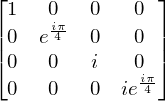

In [10]:
represent(T(0)*S(1),nqubits = 2)

すでに対角化されており、固有値の位相の２進数表示は、0.0,0.001,0.01,0.011であり、これらを誤差なく測定するためには３つの補助量子ビットが必要である。` CGateS ` を用いてこれを制御化した ` cP_2,3,4 `を定義しよう。（2,3,4が３つの補助量子ビットに対応している。）

In [11]:
cP_2 = CGateS(2,T(0))*CGateS(2,S(1))
cP_3 = CGateS(3,T(0))*CGateS(3,S(1))
cP_4 = CGateS(4,T(0))*CGateS(4,S(1))

３つの補助量子ビットを用いて、位相推定アルゴリズムを構成していこう。

In [12]:
PhaEst = H(4)*H(3)*H(2)
PhaEst

制御ユニタリーをそれぞれ、1回、２回、４回と作用させていく。

In [13]:
PhaEst = cP_2*cP_3*cP_3*cP_4*cP_4*cP_4*cP_4*PhaEst

ここから逆量子フーリエ変換を構築する。小数第3位については、補助量子ビット4にH演算を作用させればよい。

In [14]:
PhaEst = H(4)*PhaEst

補助量子ビット3には、まず補助量子ビット4を制御とする制御$R_2=S^{-1}=SZ$演算を作用させる。

In [15]:
PhaEst = CGateS(4,S(3))*PhaEst
PhaEst = CGateS(4,Z(3))*PhaEst

その後にH演算を作用させる。

In [16]:
PhaEst = H(3)*PhaEst

補助量子ビット2には、

- 補助量子ビット3を制御とする制御$R_2 = S^{-1} = SZ$演算
- 補助量子ビット4を制御とする制御$R_3 = TS^{-1} = TSZ$演算
- H演算

の3つを作用させる。

In [17]:
PhaEst = CGateS(3,S(2))*PhaEst
PhaEst = CGateS(3,Z(2))*PhaEst

In [18]:
PhaEst = CGateS(4,T(2))*PhaEst
PhaEst = CGateS(4,S(2))*PhaEst
PhaEst = CGateS(4,Z(2))*PhaEst
PhaEst = H(2)*PhaEst

このように構成した位相推定アルゴリズムを固有ベクトルに作用させてみよう。アルゴリズム自体は非常に複雑だ。

In [19]:
PhaEst

しかし実際、入力に作用させると、